C:\Users\Redouane\AppData\Local\Temp\ipykernel_19092\3401666038.py:49: RuntimeWarning: overflow encountered in exp
  a = np.exp(ln_a)


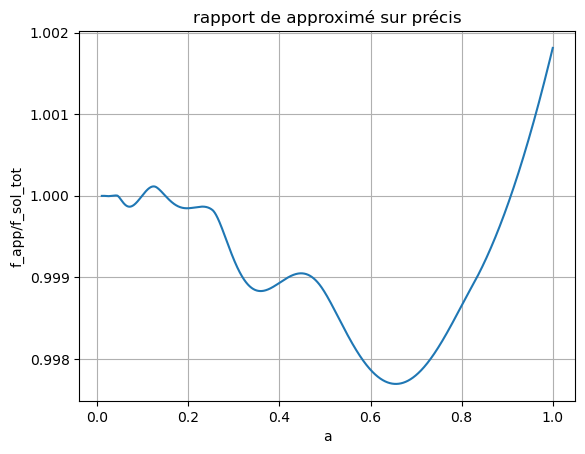

In [ ]:
import matplotlib.pyplot as plt
import random as rdn
import numpy as np
import scipy
import math
from scipy.optimize import minimize
from scipy.integrate import quad
from iminuit import Minuit
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


df = pd.read_csv("fsigma8_data.dat", sep=";")

z = np.array((df['z'].copy()).tolist())
fsig8 = np.array((df['fsig8'].copy()).tolist())
fsig8_err_minus = np.array((df['fsig8_err_minus'].copy()).tolist())
fsig8_err_max = np.array((df['fsig8_err_plus'].copy()).tolist())

a_list = np.array([])
for element in z:
    a_list = np.append(a_list,(1/(1+element)))
    
# Constantes générales
H0 = 70  # Hubble constant
a_start = 0.01
a_end = 10.0
step = 1e-4
nb_sample = int(np.abs(a_end - a_start) / step) + 1
ln_a_vals = np.linspace(np.log(a_start), np.log(a_end), nb_sample)
f0 = [1.0]  # condition initiale

omega_m0 = 0.3  
omega_M0_list = np.linspace(0.3, 0.3,1)

# Fonctions dépendant de Omega_m0 — on passera ce paramètre séparément
def H(a, Omega_m0):
    return H0 * np.sqrt(Omega_m0 / a**3 + (1 - Omega_m0))

def Omega_m(a, Omega_m0):
    return Omega_m0  / (Omega_m0+(1-Omega_m0)*a**3)

def dlnH2_dlna(a, Omega_m0):
    return -3 * Omega_m0 / (Omega_m0 + (1 - Omega_m0) * a**3)

def dfdlna(ln_a, f, Omega_m0):
    a = np.exp(ln_a)
    return -f**2 - (2 + 0.5 * dlnH2_dlna(a, Omega_m0)) * f + 1.5 * Omega_m(a, Omega_m0)

def calculate_alpha(w, Omega):
    # Calcul de la première partie de l'équation
    term1 = 3 / (5 - w / (1 - w))

    # Calcul de la deuxième partie de l'équation
    term2 = (3 / 125) * ( ((1 - w) * (1 - (3 * w / 2)) * (1 - Omega)) / ((1 - (6 * w / 5)) ** 3))

    # Calcul de la troisième partie de l'équation

    # Calcul de alpha
    alpha = term1 + term2 

    return alpha

def omega_mGamma(a,gamma,omega_m0):
    res = np.array([])
    for i in range(len(a)):
        res = np.append(res,(omega_m0*(1/(omega_m0+(1-omega_m0)*a[i]**3)))**gamma)
    return res   
    

def div_appVsSolved(app,sol):
    res = np.array([])
    for i in range(len(app)):
        if (app[i] or sol[i]) != 0:
            res = np.append(res,app[i]/sol[i])
            
    return res   

w = -1  # exemple de valeur pour w
Omega = 0.3  # exemple de valeur pour Omega
gamma = calculate_alpha(w, omega_m0)
sol = solve_ivp(lambda ln_a, f: dfdlna(ln_a, f, omega_m0),(ln_a_vals[0], ln_a_vals[-1]),f0,t_eval=ln_a_vals)
a = np.exp(sol.t)
y = div_appVsSolved(omega_mGamma(a,gamma,omega_m0),sol.y[0])

plt.plot(a,y)
plt.xlabel('a')
plt.ylabel('f_app/f_sol_tot')
plt.title('rapport de approximé sur précis')
plt.grid()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:9: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Redouane\AppData\Local\Temp\ipykernel_19092\2335704606.py:9: SyntaxWarning: invalid escape sequence '\O'
  plt.legend(title="Paramètres $\Omega_{m0}$", loc="best")


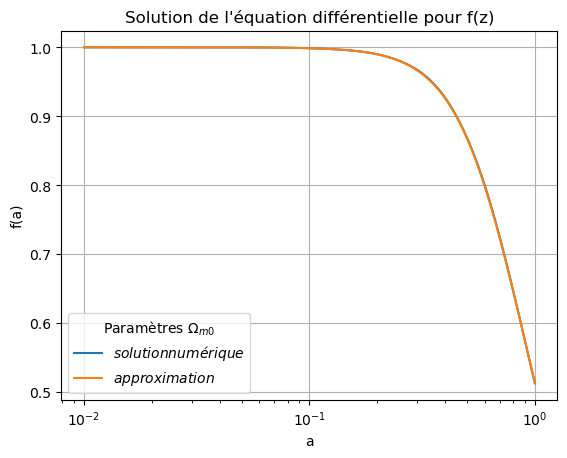

In [10]:
plt.plot(a,sol.y[0],label=f"$solution numérique$")
plt.plot(a, omega_mGamma(a, gamma, omega_m0), label=f"$approximation$")

plt.xscale('log')
plt.xlabel('a')
plt.ylabel('f(a)')
plt.title('Solution de l\'équation différentielle pour f(z)')
plt.grid(True)
plt.legend(title="Paramètres $\Omega_{m0}$", loc="best")
plt.show()


In [12]:
print(0.761*(0.34/0.3)**(1/2))

0.8101463653768579
